# [intro] Creating Quantum Programs

* _Anton Karazeev_, you can text me: [anton.karazeev@gmail.com](mailto:anton.karazeev@gmail.com) or [t.me/akarazeev](t.me/akarazeev)
* Based on [QISKit tutorial](https://github.com/QISKit/qiskit-tutorial)

In [9]:
import os
import sys
from math import pi

from IPython.display import Image

import Qconfig
from qiskit import QuantumProgram
from qiskit.tools.visualization import plot_histogram

assert sys.version_info >= (3,5), "Only Python 3.5 or greater supported."

In [65]:
# Create your first QuantumProgram object instance.
Q_program = QuantumProgram()
Q_program.set_api(Qconfig.APItoken, Qconfig.config["url"])
Q_program.set_api(token, Qconfig.config["url"])

# List of available backends.
Q_program.available_backends()

['ibmqx5',
 'ibmqx4',
 'ibmqx_hpc_qasm_simulator',
 'ibmqx2',
 'ibmqx_qasm_simulator',
 'local_projectq_simulator',
 'local_qasm_simulator',
 'local_clifford_simulator',
 'local_qiskit_simulator',
 'local_unitary_simulator']

In [66]:
# Check availability of backend.
Q_program.get_backend_status('ibmqx2')

{'available': True, 'backend': 'ibmqx2', 'busy': False, 'pending_jobs': 1}

In [67]:
# Backend configuration.
Q_program.get_backend_configuration('ibmqx2')

{'basis_gates': 'u1,u2,u3,cx,id',
 'chip_name': 'Sparrow',
 'coupling_map': {0: [1, 2], 1: [2], 3: [2, 4], 4: [2]},
 'description': '5 transmon bowtie',
 'n_qubits': 5,
 'name': 'ibmqx2',
 'online_date': '2017-01-10T12:00:00.000Z',
 'simulator': False,
 'url': 'https://ibm.biz/qiskit-ibmqx2',
 'version': '1'}

## Let's build a simple circuit

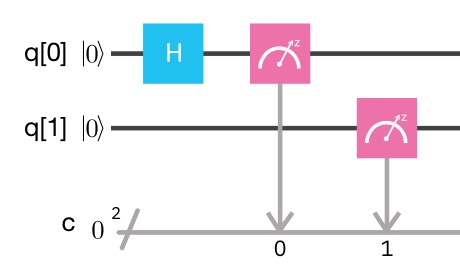

In [6]:
Image(filename='img/Screen Shot 2018-02-28 at 23.21.02.jpg', width=300)

In [68]:
n = 2  # Number of qubits.
q_registers = Q_program.create_quantum_register("q", n)
c_registers = Q_program.create_classical_register("c", n)

# Build a circuit.
circuit_name = 'single_h_circuit'
single_h = Q_program.create_circuit(circuit_name, [q_registers], [c_registers])
single_h.h(q_registers[0])
single_h.measure(q_registers[0], c_registers[0])

In [69]:
# Execute the quantum circuit `circuit_name`.
result = Q_program.execute([circuit_name], backend='ibmqx_hpc_qasm_simulator', shots=1024)
print(result)

COMPLETED


In [70]:
# Get data of experiment.
data = result.get_data(circuit_name)
data

{'additionalData': {'seed': 2890912561},
 'counts': {'00': 529, '01': 495},
 'creg_labels': 'c[2]',
 'date': '2018-03-01T11:19:14.889Z',
 'time': 0.00999699}

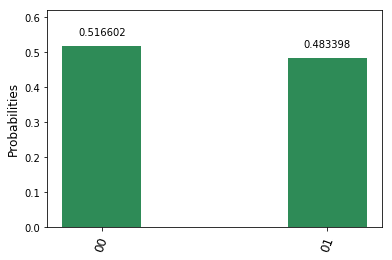

In [71]:
plot_histogram(data["counts"])

# More circuits

Run experiments on **simulated** qubits.

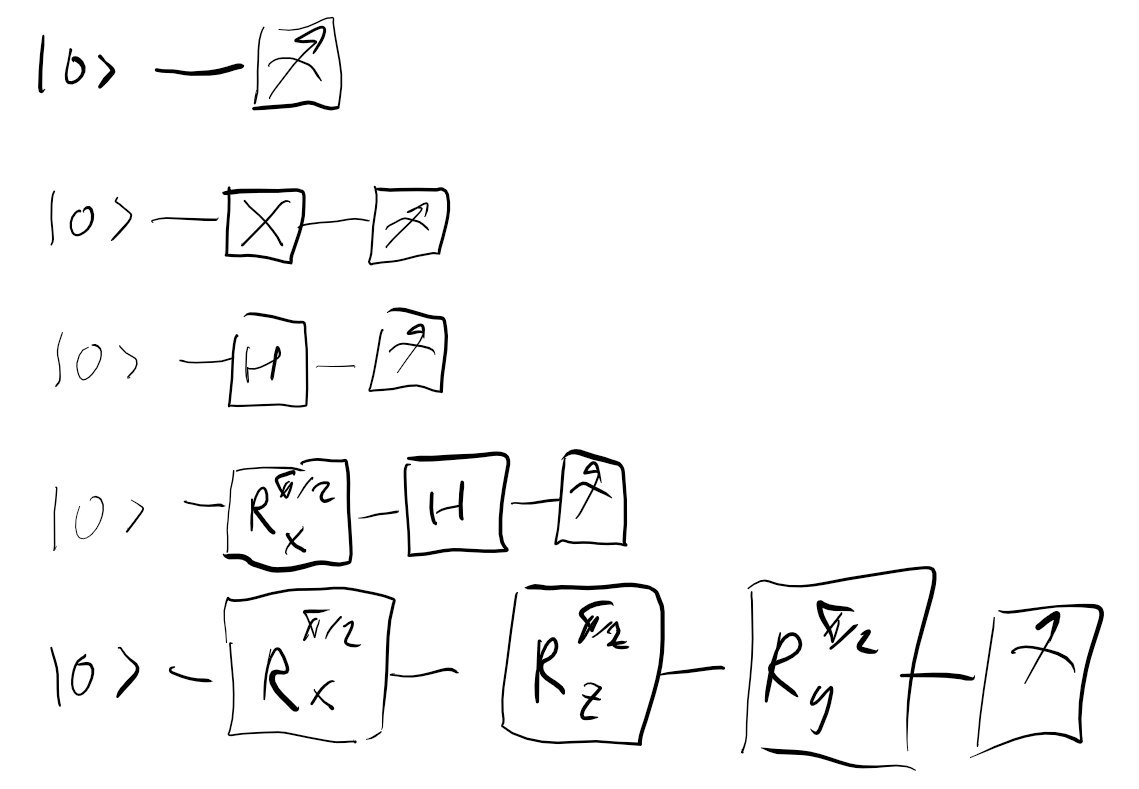

In [72]:
Image(filename="img/2018-02-28 21.57.31.jpg", width=300)

COMPLETED no_gates


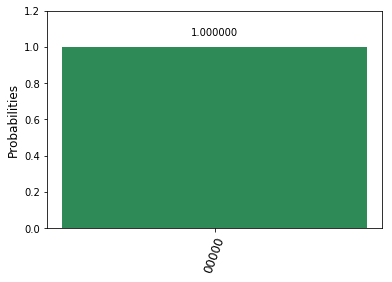

In [73]:
circuit_name = 'no_gates'

n = 5
q_regs = Q_program.create_quantum_register("q_" + circuit_name, n)
c_regs = Q_program.create_classical_register("c_" + circuit_name, n)

# Build a circuit.
circuit = Q_program.create_circuit(circuit_name, [q_regs], [c_regs])
circuit.measure(q_regs[0], c_regs[0])

# Execute the quantum circuit `circuit_name`.
result = Q_program.execute([circuit_name], backend='ibmqx_hpc_qasm_simulator', shots=1024, max_credits=3, wait=10, timeout=600)
print(result, circuit_name)

data = result.get_data(circuit_name)
plot_histogram(data["counts"])

COMPLETED x_gate


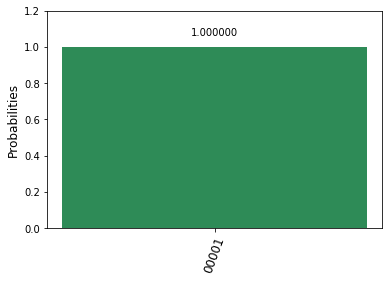

In [74]:
circuit_name = 'x_gate'

n = 5
q_regs = Q_program.create_quantum_register("q_" + circuit_name, n)
c_regs = Q_program.create_classical_register("c_" + circuit_name, n)

# Build a circuit.
circuit = Q_program.create_circuit(circuit_name, [q_regs], [c_regs])
circuit.x(q_regs[0])
circuit.measure(q_regs[0], c_regs[0])

# Execute the quantum circuit `circuit_name`.
result = Q_program.execute([circuit_name], backend='ibmqx_hpc_qasm_simulator')
print(result, circuit_name)

data = result.get_data(circuit_name)
plot_histogram(data["counts"])

COMPLETED h_gate


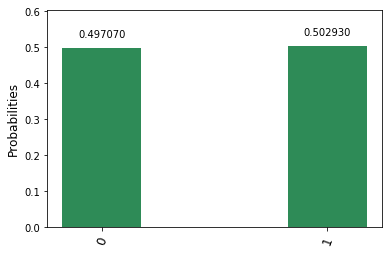

In [75]:
circuit_name = 'h_gate'

n = 1
q_regs = Q_program.create_quantum_register("q_" + circuit_name, n)
c_regs = Q_program.create_classical_register("c_" + circuit_name, n)

# Build a circuit.
circuit = Q_program.create_circuit(circuit_name, [q_regs], [c_regs])
circuit.h(q_regs[0])
circuit.measure(q_regs[0], c_regs[0])

# Execute the quantum circuit `circuit_name`
result = Q_program.execute([circuit_name], backend='ibmqx_hpc_qasm_simulator')
print(result, circuit_name)

data = result.get_data(circuit_name)
plot_histogram(data["counts"])

COMPLETED ry_h


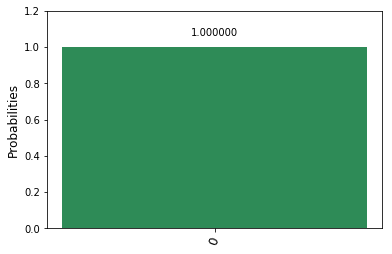

In [76]:
circuit_name = 'ry_h'

n = 1
q_regs = Q_program.create_quantum_register("q_" + circuit_name, n)
c_regs = Q_program.create_classical_register("c_" + circuit_name, n)

# Build a circuit.
circuit = Q_program.create_circuit(circuit_name, [q_regs], [c_regs])

# Set an angle for rotation.
theta = pi / 2
circuit.ry(theta, q_regs[0])
circuit.h(q_regs[0])
circuit.measure(q_regs[0], c_regs[0])

# Execute the quantum circuit `circuit_name`.
result = Q_program.execute([circuit_name], backend='ibmqx_hpc_qasm_simulator')
print(result, circuit_name)

data = result.get_data(circuit_name)
plot_histogram(data["counts"])

COMPLETED rx_rz_rx


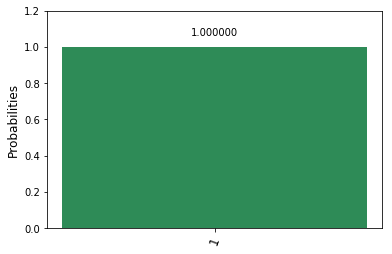

In [77]:
circuit_name = 'rx_rz_rx'

n = 1
q_regs = Q_program.create_quantum_register("q_" + circuit_name, n)
c_regs = Q_program.create_classical_register("c_" + circuit_name, n)

# Build a circuit.
circuit = Q_program.create_circuit(circuit_name, [q_regs], [c_regs])

# Set an angle for rotation.
theta = pi / 2
circuit.rx(theta, q_regs[0])
circuit.rz(theta, q_regs[0])
circuit.ry(theta, q_regs[0])
circuit.measure(q_regs[0], c_regs[0])

# Execute the quantum circuit `circuit_name`.
result = Q_program.execute([circuit_name], backend='ibmqx_hpc_qasm_simulator')
print(result, circuit_name)

data = result.get_data(circuit_name)
plot_histogram(data["counts"])

## Collect all circuits together to execute them on ibmqx2

Run experiments on **real** quantum chip `ibmqx2` with 5 qubits.

In [56]:
n = 5
q_regs = Q_program.create_quantum_register("q_" + circuit_name, n)
c_regs = Q_program.create_classical_register("c_" + circuit_name, n)

# Build circuits.
# Simple gates.
no_gates = Q_program.create_circuit('no_gates', [q_regs], [c_regs])
no_gates.measure(q_regs[0], c_regs[0])

x_gate = Q_program.create_circuit('x_gate', [q_regs], [c_regs])
x_gate.x(q_regs[0])
x_gate.measure(q_regs[0], c_regs[0])

h_gate = Q_program.create_circuit('h_gate', [q_regs], [c_regs])
h_gate.h(q_regs[0])
h_gate.measure(q_regs[0], c_regs[0])

# Now with rotations.
theta = pi / 2  # Angle for rotations.
ry_h = Q_program.create_circuit('ry_h', [q_regs], [c_regs])
ry_h.ry(theta, q_regs[0])
ry_h.h(q_regs[0])
ry_h.measure(q_regs[0], c_regs[0])

rx_rz_ry = Q_program.create_circuit('rx_rz_ry', [q_regs], [c_regs])
rx_rz_ry.rx(theta, q_regs[0])
rx_rz_ry.rz(theta, q_regs[0])
rx_rz_ry.ry(theta, q_regs[0])
rx_rz_ry.measure(q_regs[0], c_regs[0])

In [ ]:
# List of circuit names.
circuits = ['no_gates', 'x_gate', 'h_gate', 'ry_h', 'rx_rz_ry']

# Execute each of them on ibmqx2.
results = Q_program.execute(circuits, backend='ibmqx2', shots=1024, max_credits=3, wait=10, timeout=600)

In [62]:
# Check status of each of the experiments.
for i in range(len(results.get_names())):
    print(results.get_circuit_status(i))

DONE
DONE
DONE
DONE
DONE


In [63]:
# List names of executed circuits.
results.get_names()

['no_gates', 'x_gate', 'h_gate', 'ry_h', 'rx_rz_ry']

no_gates


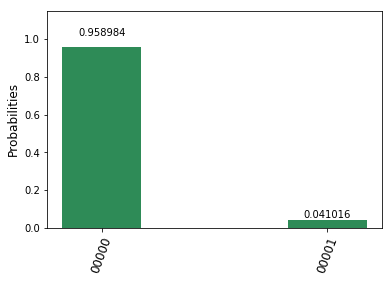

x_gate


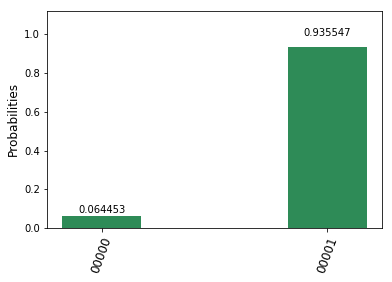

h_gate


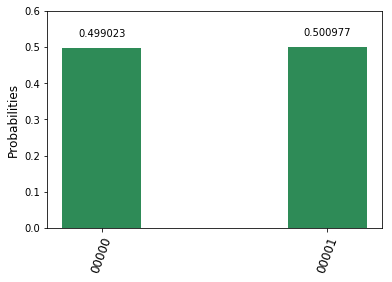

ry_h


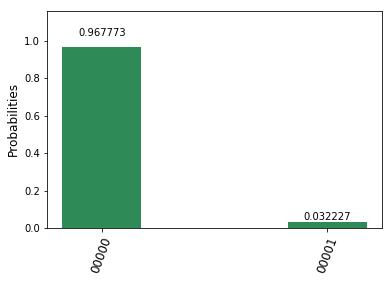

rx_rz_ry


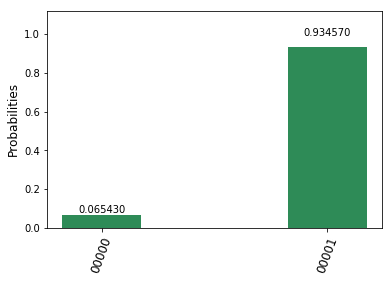

In [64]:
# Plot results for each of the experiments.
for name in results.get_names():
    print(name)
    plot_histogram(results.get_counts(name))